In [36]:
import numpy as np
import pandas as pd

In [37]:
df = pd.read_csv(r"Datasets/Student_Performance.csv")

In [38]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [39]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [40]:
df.shape

(10000, 6)

In [41]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

## check if there is any duplicated data

In [42]:
df.duplicated().sum()

np.int64(127)

## Feature overview

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


## Summary statistics (numerical features)

In [44]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [45]:
!pip install seaborn 

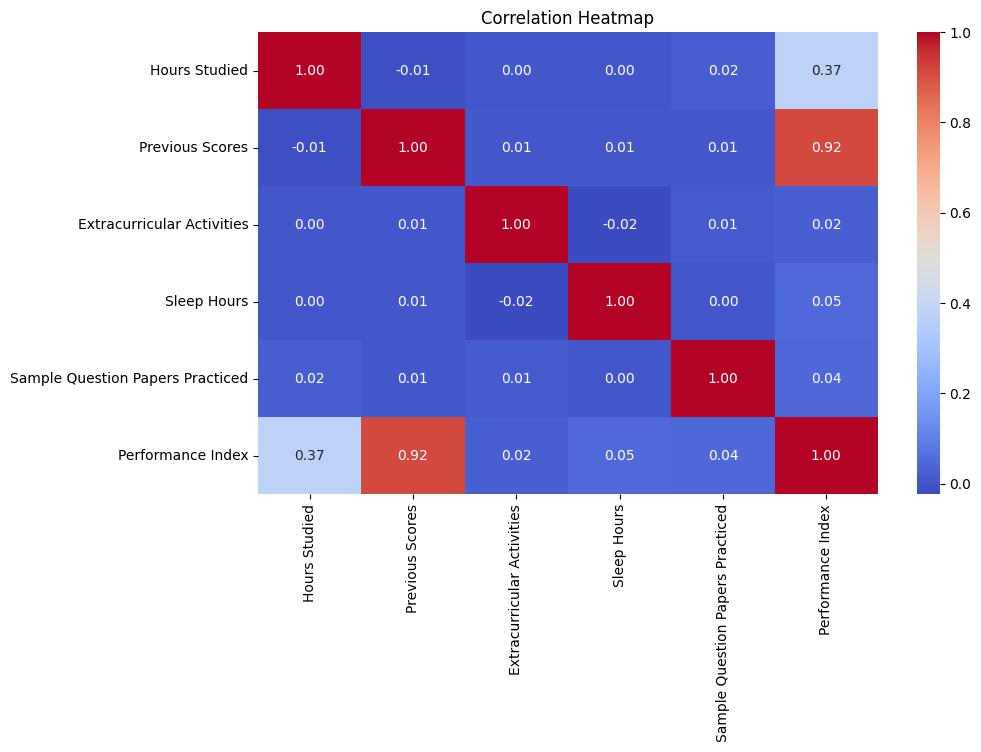

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# If there are categorical (string) columns, convert them to numbers first
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=["object"]).columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Correlation matrix
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [47]:
# العلاقة الخطية بين عمودين (Correlation)
# - The correlation value ranges from -1 to 1.
# - Correlation shows how strong or weak the linear relationship is.
# - High correlation means the two columns move together strongly.
# - Covariance looks at the difference between two variables, but it’s harder to interpret.
# - Correlation is the normalized version of covariance.
# - Range:
#     -1 → perfect negative correlation
#      0 → no correlation
#     +1 → perfect positive correlation
# - Example: correlation between x and -x = -1 (perfect negative correlation).
# - A perfect correlation means one variable is a linear transformation of the other
#   (multiplying or adding a constant).
# - Rough rule:
#     0.7 ≈ strong correlation
#     0.9 ≈ very strong correlation
#     1.0 = perfect linear transformation

# Correlation Heatmap:
# - If two columns have the same values, correlation = 1 (which may cause issues in regression,
#   like making the matrix non-invertible).
# - A diagonal line in the heatmap shows correlation of each column with itself (=1).
# - If the output (target) is highly correlated with a feature, that feature is a strong predictor.


## correlation heatmap insights:

#### performance Index vs Previous Scores (0.92):
#### Strong positive correlation. Students who performed well previously are highly likely to perform well again.

#### Performance Index vs Hours Studied (0.37):
#### Moderate positive correlation. More study hours are linked with better performance, but not as strongly as previous scores.

#### Performance Index vs Other Factors (near 0):

#### Extracurricular Activities (0.02): Almost no effect on performance in this dataset.

#### Sleep Hours (0.05): Weak positive correlation, suggesting little impact.

#### Sample Question Papers Practiced (0.04): Surprisingly low impact here—possibly due to low data variation.

#### Other Variables Among Themselves:

#### Most are close to 0, meaning no significant interrelationship (e.g., hours studied and sleep hours don’t correlate).

#### Negative values are close to 0 (like Hours Studied vs Previous Scores: -0.01), meaning the negative trend is negligible.

## 3. Data Pre-processing

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Encode categorical features


In [49]:
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


### Define features (X) and target (y)
***Split the dataset into training and testing sets:
Training set size: 80% of the data
Testing set size: 20% of the data
Random seed: 42 (to ensure reproducibility)***

In [61]:
from sklearn.preprocessing import StandardScaler

# Split first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale AFTER split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on training
X_test_scaled = scaler.transform(X_test)        # transform test only

print("Training set:", X_train_scaled.shape)
print("Testing set:", X_test_scaled.shape)


Training set: (8000, 5)
Testing set: (2000, 5)


## Build the Regression Model

In [62]:
from sklearn.linear_model import LinearRegression

# Initialize and train
model = LinearRegression()
model.fit(X_train, y_train) # .fit is the process where the model learns its parameters (the beta/weight values)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
# Coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("\nRegression Coefficients:\n", coefficients)


Regression Coefficients:
                             Feature  Coefficient
0                     Hours Studied     2.852484
1                   Previous Scores     1.016988
2        Extracurricular Activities     0.608617
3                       Sleep Hours     0.476941
4  Sample Question Papers Practiced     0.191831


### coefficient = the weight/importance of a feature in predicting the result.

In [64]:
## Evaluation of the linear regression model

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
#----------------
# You give the model X values (features) to predict the output Y.
# The predicted Y is then compared with the actual Y (y_test).
# The model performs well if the predicted values are close to the real values.

y_pred = model.predict(X_test) #you need to give x_test to predict 

# Metrics
mse = mean_squared_error(y_test, y_pred) #it will find the difference between y predict and the y test
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)



Model Evaluation:
MSE: 4.082628398521853
RMSE: 2.0205515085050054
R²: 0.9889832909573145


### --------------------------